# ANN Training Strategies

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

In [ ]:
K.clear_session()
model = keras.models.Sequential()

The code run as a whole will not give you a meaningful output, so don't run the whole notebook and expect a result. The code is meant to illustrate different training strategies.

## Activation Functions

In [ ]:
model.add(layers.Dense(64, activation=keras.activations.sigmoid))

In [ ]:
model.add(layers.Dense(64))
model.add(layers.Activation(keras.activations.sigmoid))

In [ ]:
model.add(layers.Dense(64, activation='sigmoid'))

In [93]:
x = np.linspace(-5, 5, 100)

#### sigmoid

In [94]:
def sigmoid(x):    
    y = 1/(1+np.exp(-x))
    plt.plot(x, y)
    return y

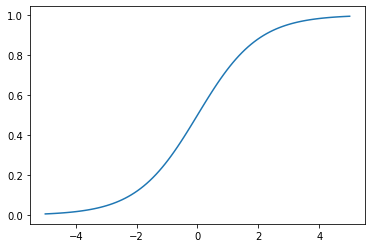

In [95]:
sigmoid(x);

#### tanh

In [96]:
def tanh(x):
    y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    plt.plot(x, y)
    return y

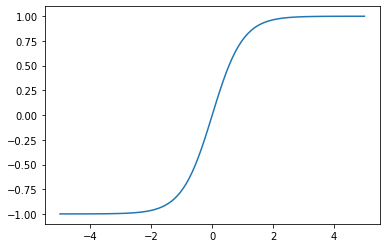

In [97]:
tanh(x);

#### ReLU

In [98]:
def relu(x):
    y = np.maximum(0, x)
    plt.plot(x, y)
    return y

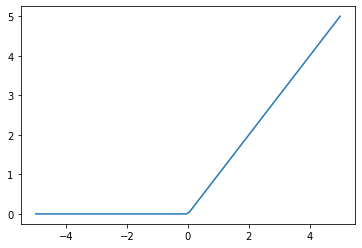

In [99]:
relu(x);

#### Leaky ReLU

In [104]:
def leaky_relu(x):
    y = np.maximum(0.1*x, x)
    plt.plot(x, y)
    return y

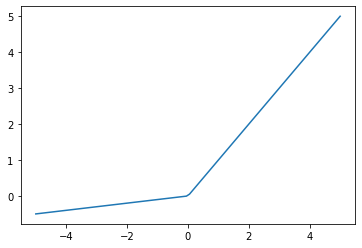

In [105]:
leaky_relu(x);

#### ELU

In [108]:
def elu(x):
    y = [i if i >= 0 else 0.5*(math.e**i -1) for i in x]
    plt.plot(x, y)
    return y

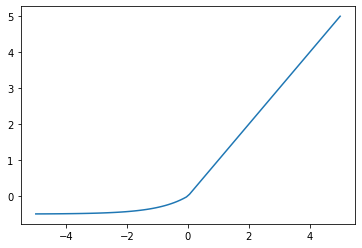

In [109]:
elu(x);

## Weights initialization

In [ ]:
model.add(layers.Dense(64,
                       kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                       bias_initializer=keras.initializers.Zeros()))

In [ ]:
model.add(layers.Dense(64,
                       kernel_initializer='random_normal',
                       bias_initializer='zeros'))

In [ ]:
model.add(layers.Dense(64,
                       kernel_initializer=keras.initializers.GlorotNormal(),
                       bias_initializer=keras.initializers.Zeros()))

## Regularization

#### L1/L2

In [ ]:
model.add(layers.Dense(64,
                       kernel_regularizer=keras.regularizers.l1(0.01)))

In [ ]:
model.add(layers.Dense(64,
                       kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)))

In [ ]:
model.add(layers.Dense(64,
                       kernel_regularizer='l2')

#### Dropout

In [ ]:
model.add(layers.Dense(64))
model.add(layers.Dropout(0.2))

#### Early Stopping

In [ ]:
# monitor is the metric to be monitored
# min_delta is the threshold under which we assume there is no improvement
# patience is the number of epochs with no improvement after which we stop training
# mode='min' means we observe for when the metric has stopped decreasing
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         min_delta=0.001,
                                         patience=5,
                                         mode='min')
hist = model.fit(xtrain,
                 ytrain,
                 epochs=__,
                 batch_size=__,
                 validation_split=__,
                 callbacks=[callback]
                 )

## Optimizers

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# epoch is a pass through the whole dataset
# batch_size is a number of datapoints used for each weights update
# e.g. if your batch_size is 1/4 of your dataset, you'll have 4 weights updates in each epoch
hist = model.fit(xtrain, ytrain,
                 epochs=__, 
                 batch_size=__,
                 validation_split=__)

## Feed-forward Neural Network with MNIST data

In [ ]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


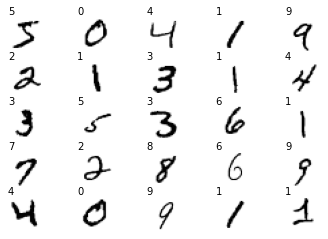

In [ ]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')
    plt.text(0, 0, ytrain[i])

In [ ]:
# flattens x from (28, 28) to (784,)
xtrain = xtrain.reshape(60000, -1)

In [ ]:
# one-hot-encodes y
ytrain = to_categorical(ytrain)

In [ ]:
K.clear_session()
model = keras.models.Sequential()

In [ ]:
# input layer
model.add(layers.Dense(units=__, 
                             activation=__, 
                             input_shape=(784, )
                             ,__))

In [ ]:
# hidden layer(s)
model.add(layers.Dense(__))
model.add(__)

In [ ]:
# output layer
model.add(layers.Dense(units=__,
                       activation=__,
                       __))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(xtrain, ytrain,
                 epochs=__, # 1 epoch is 1 iteration over entire X and y data
                 batch_size=__, # number of samples per gradient update
                 validation_split=__)

Epoch 1/100
1500/1500 [==============================] - 4s 2ms/step - loss: 8.0926 - accuracy: 0.7788 - val_loss: 0.7500 - val_accuracy: 0.8953
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6697 - accuracy: 0.9005 - val_loss: 0.5425 - val_accuracy: 0.9123
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5324 - accuracy: 0.9213 - val_loss: 0.7207 - val_accuracy: 0.9204
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4781 - accuracy: 0.9329 - val_loss: 0.6125 - val_accuracy: 0.9342
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4287 - accuracy: 0.9390 - val_loss: 0.7365 - val_accuracy: 0.9377
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4274 - accuracy: 0.9427 - val_loss: 0.7117 - val_accuracy: 0.9315
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4047 - accuracy: 0.9465 - val_loss: 0.5960 - val_ac

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

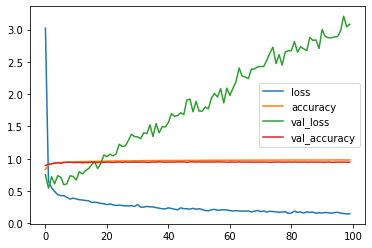

In [ ]:
pd.DataFrame(hist.history).plot()